In [1]:
#read in the data
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
#check the dataframe
print(star_wars.head(10))
print(len(star_wars))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
#check df columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#retain data where 'RespondentID' is not null
star_wars = star_wars[star_wars['RespondentID'].notnull()]
#check how many rows retained
print(len(star_wars))

1186


In [5]:
#convert 'YES'/'NO' into True/False to simplify future calculations
yes_no_map = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
#rename column names for whether an episode has been seen
star_wars = star_wars.rename(columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
})
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

In [7]:
#convert data for whether a movie has been seen into True/False
movies = ['seen_{0}'.format(i) for i in range(1,7)]
from numpy import NaN
seen_map = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    NaN: False
}
for i in movies:
    star_wars[i] = star_wars[i].map(seen_map)
    print(star_wars[i].value_counts())

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


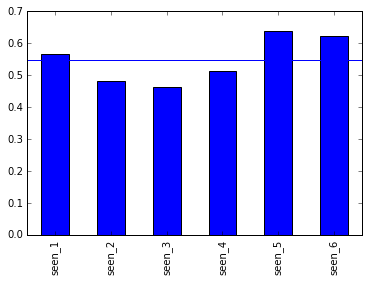

In [39]:
#calculate the percentage of respondents who have watched respective episodes and the average across all episodes
perc_viewed = star_wars[movies].sum() / len(star_wars[movies])
perc_viewed.plot.bar()
plt.axhline(perc_viewed.mean())

In [8]:
#rename column names for rankings
star_wars = star_wars.rename(columns = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10': 'rank_2',
    'Unnamed: 11': 'rank_3',
    'Unnamed: 12': 'rank_4',
    'Unnamed: 13': 'rank_5',
    'Unnamed: 14': 'rank_6'
})
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'rank_1',
       'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='obje

In [9]:
#convert ranking data into numerics and check results
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
ranking = ['rank_{0}'.format(i) for i in range(1,7)]
for i in ranking:
    print(star_wars[i].value_counts().sort_index(0))

1.0    129
2.0     71
3.0    130
4.0    237
5.0    100
6.0    168
Name: rank_1, dtype: int64
1.0     32
2.0    116
3.0    103
4.0    183
5.0    300
6.0    102
Name: rank_2, dtype: int64
1.0     36
2.0     47
3.0    150
4.0    182
5.0    203
6.0    217
Name: rank_3, dtype: int64
1.0    204
2.0    135
3.0    127
4.0    130
5.0     79
6.0    161
Name: rank_4, dtype: int64
1.0    289
2.0    235
3.0    106
4.0     47
5.0    118
6.0     41
Name: rank_5, dtype: int64
1.0    146
2.0    232
3.0    220
4.0     57
5.0     36
6.0    145
Name: rank_6, dtype: int64


rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64


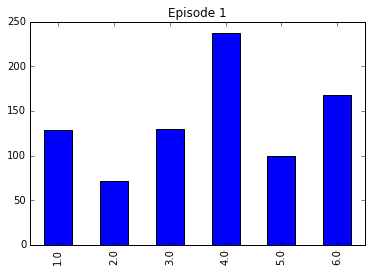

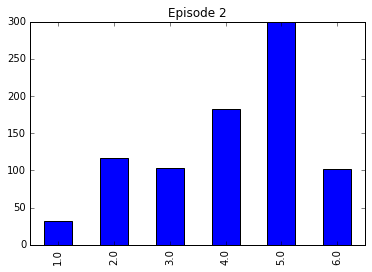

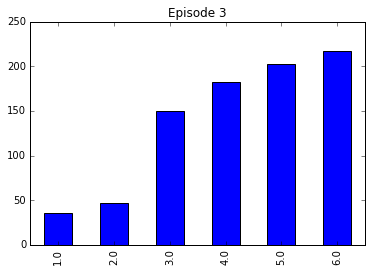

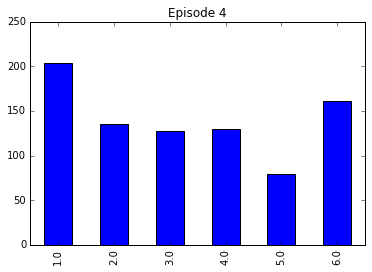

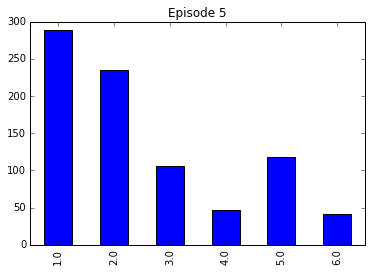

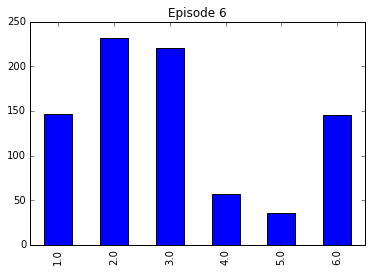

In [31]:
#perform ranking analysis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print(star_wars[ranking].mean())

for key, item in enumerate(ranking):
    star_wars[item].value_counts().sort_index(0).plot.bar()
    plt.title('Episode ' + str(key+1))
    plt.show()

# Finding So Far
## Key Tasks Performed
- Clean data to only include valid respondents
- Wrangle data to improve the readability of columns
- Map data from strings to boolmeans to simplify computations

## Analysis
- Review means and distribtuions for the columns on whether an episode was seen and its ranking
- Episode IX was watched the least, maybe due to its publication year dating way back
- However, we can conclude that each episode had been watched by similar  percentage of respondents
- Episode III received the most negative feedbacks
- Episode V received the the most positive feedbacks
- Episode IV received polarizing feedbacks, with large numbers of respondents scoring it at either 1 (best) or 6 (worst)

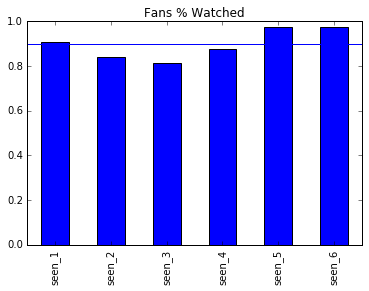

In [48]:
#further analysis by segments
#does the respondent consider himself as a fan?

fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

#calculate the percentage of fans who have watched respective episodes and the average across all episodes
fan_perc_viewed = fans[movies].sum() / len(fans[movies])
fan_perc_viewed.plot.bar()
plt.axhline(fan_perc_viewed.mean())
plt.title('Fans % Watched')

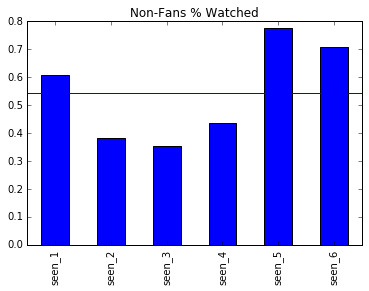

In [49]:
#calculate the percentage of non-fans who have watched respective episodes and the average across all episodes
non_fan_perc_viewed = non_fans[movies].sum() / len(non_fans[movies])
non_fan_perc_viewed.plot.bar()
plt.axhline(non_fan_perc_viewed.mean())
plt.title('Non-Fans % Watched')

rank_1    4.141304
rank_2    4.342391
rank_3    4.417423
rank_4    2.932971
rank_5    2.333333
rank_6    2.829710
dtype: float64


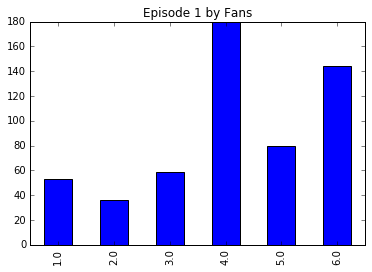

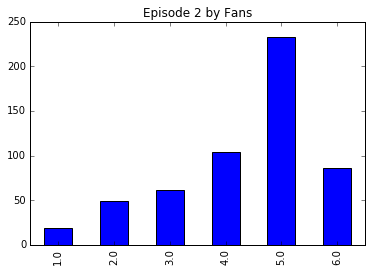

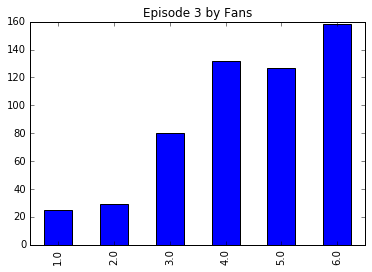

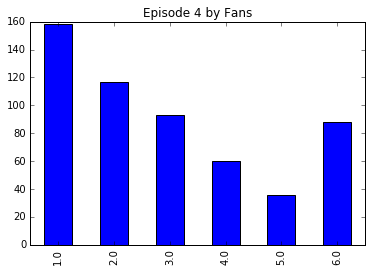

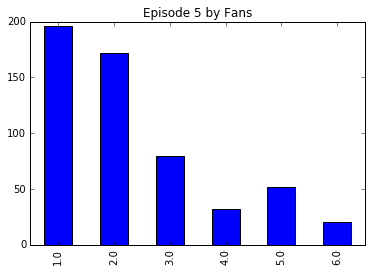

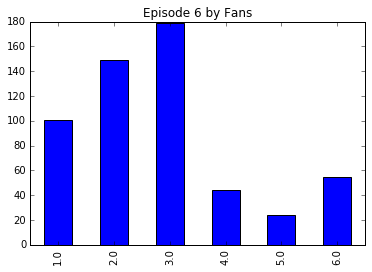

In [50]:
#perform ranking analysis for fans
print(fans[ranking].mean())

for key, item in enumerate(ranking):
    fans[item].value_counts().sort_index(0).plot.bar()
    plt.title('Episode ' + str(key+1) + ' by Fans')
    plt.show()

rank_1    2.936396
rank_2    3.591549
rank_3    4.193662
rank_4    3.933099
rank_5    2.862676
rank_6    3.471831
dtype: float64


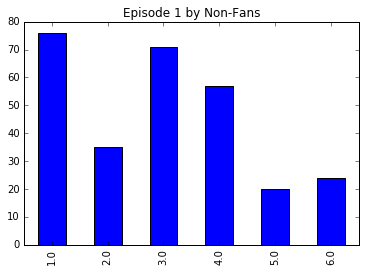

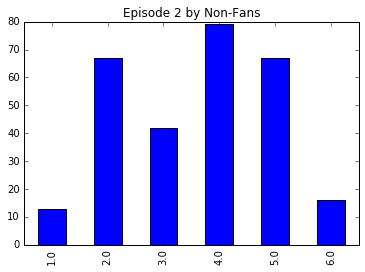

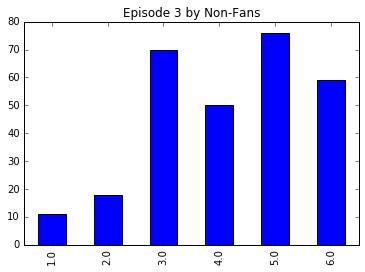

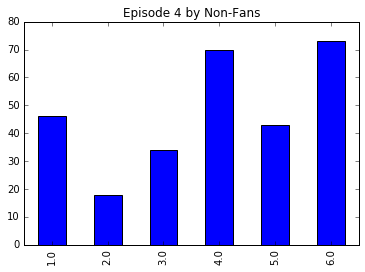

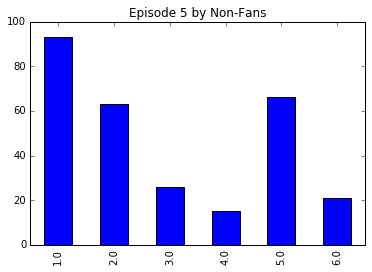

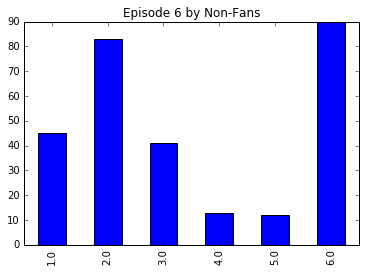

In [51]:
#perform ranking analysis for non-fans
print(non_fans[ranking].mean())

for key, item in enumerate(ranking):
    non_fans[item].value_counts().sort_index(0).plot.bar()
    plt.title('Episode ' + str(key+1) + ' by Non-Fans')
    plt.show()

# Finding So Far
## Fans vs Non-Fans
- Fans watched almost all the six episodes
- Non-fans watched mostly Episode I, IV, and V
- Non-fans are less critical on Episode I - III. In fact, a good portion of them enjoyed Episode I
- Non-fans are, however, critical on Episode IV. A fairly large protion of them ranked it as their less favorite episode (rank 4-6).
- There is definitely a descrepancies in taste between the fans and non-fans.